# Deep Learning Time Series COVID-19 Cases Prediction

## Project Setup

### Dependencies importing

In [1]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2

In [57]:
import numpy as np
import pandas as pd
import scipy
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import requests
import pandas_profiling
from typing import overload
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import RMSprop 
from covid_time_series_prediction.ml_logic import preprocessor
# from ml_logic.country_data import country_output
from covid_time_series_prediction.ml_logic.preprocessor import train_test_set, scaler

## Data sourcing

### Data API 

#### By country over time

In [ ]:
# def fetch_time_series(feature='stringency', start_date='2020-02-14', end_date='2021-02-14'):
#     """
#     Get stringency time series for each countries requesting API.
#     Returns json dict with TS between start_date and end_date like 'YYYY-MM-DD'.
#     """
#     url = f'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/{feature}/date-range/{start_date}/{end_date}'
#     response = requests.get(url)
#     if response.status_code != 200:
#         return ''
#     data = response.json()
#     return data

In [ ]:
# countries_time_series_api = fetch_time_series()

In [ ]:
# [(k, [c for c in v if c == 'VNM'])  for k, v in countries_time_series_api.items()  if k == 'countries' ]

In [ ]:
# [([([([(vee)  for kaaa, veee  in vee.items() if kaaa in ['date_value', 'confirmed']  ])  for kaa, vee  in ve.items() if kaa =='VNM'   ])  for ka, ve  in v.items() ])  for k, v in countries_time_series_api.items() if k=='data'   ]

In [ ]:
# [(k, [(ka, [(kaa, vee)  for kaa, vee  in ve.items() if kaa =='USA'   ])  for ka, ve  in v.items() ])  for k, v in countries_time_series_api.items() if k=='data'   ]

#### Country data for a specific day

In [ ]:
# def fetch_data(country='USA', date='2020-08-14'):
#     """
#     Get stringency data for one country {ALPHA-3} requesting API.
#     Returns json dict with data for country like 'AAA' and specific date and like 'YYYY-MM-DD'.
#     """
#     url = f'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/actions/{country}/{date}'
#     response = requests.get(url)
#     if response.status_code != 200:
#         return ''
#     data = response.json()
#     return data

In [ ]:
# country_data_api = fetch_data()

In [ ]:
# [[';'.join([str(kk) for kk, vv in d.items()]) for i, d in enumerate(v) if type(d) == dict and i == 0] for v in country_data_api.values()][0]

In [ ]:
# [[';'.join([str(vv) for kk, vv in d.items()]) for d in v if type(d) == dict] for v in country_data_api.values()][0]

In [ ]:
# # [';'.join([str(vv) for vv in v]) for v in country_data_api.values()][-1]
# [';'.join([str(kk) for kk in v]) for k, v in country_data_api.items()][-1]

### Raw data

In [ ]:
# #### Data project directory
# data_dir = '../data/raw_data/'

#### **Read URL**, **Get CSV files** and **store CSV in local**  *(optional do it at begining or to refresh CSV data)*

##### **get_database_to_csv()** function

In [ ]:
# def get_database_to_csv(url, csv_list, path='', db_grid=[]) -> list:
#     """
#     function that take in parameter:
#      - a root URL (string) to get the CSV data,
#      - a list of CSV files,
#      - a path (string) to store CSV in local,
#      - a grid (list of list) to add in the CSV filename, URL, local path.     
#     and returns the gird updated with the CSVs of the list
    
#     """

#     ### Create a database grid (list of list) with all CSVs and associated URLs
#     # print('db_grid', db_grid)
#     #### Data project directory (if empty do not store CSV in local)
#     # print('path', path)
#     ### Website CSV datasets URL
#     # print('url', url)
#     #### List of CSVs of Website to retrieve
#     # print('csv_list', csv_list)

#     #### Length of grid aka number of CSVs already stored in grid
#     len_grid = len(db_grid)

#     for l in range(len(csv_list)):
#         sub_list = []       
#         sub_list.append(csv_list[l]) ## 1st pos°: CSV filename
#         sub_list.append(url + csv_list[l]) ## 2nd pos°: URL + CSV
#         if len(data_dir) > 0: ## store CSV in local
#             sub_list.append(data_dir + csv_list[l]) ## 3rd pos°: local data path + CSV
#             !curl -L "{url + csv_list[l]}" > {data_dir + csv_list[l]} ## curl <URL>/<CSV> => <path>
#         # print('sub_list', sub_list)
#         db_grid.append(sub_list)

#     ### Return a database grid (list of list) with all CSVs and associated URLs
#     return db_grid

#### **Get database to csv** with **get_database_to_csv()** function

In [ ]:
# ### Oxford Master data time series URL
# url_root_oxford = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/'

# #### List of CSVs of Oxford database Feel free to add more feature...
# ## index_strigency missed!
# ## 'E3;Fiscal measures;' missed!
# ## 'E4;International support;' missed!
# ## 'H3;Contact tracing;' missed!
# ## 'H4;Emergency investment in healthcare!
# ## 'H5;Investment in vaccines missed!
# ## 'V1;Vaccine Prioritisation missed!
# ## 'V2;Vaccine Availability missed!
# ## 'V3;Vaccine Financial Support!
# ## 'V4;Mandatory Vaccination missed!
# csv_list = ['confirmed_cases.csv', 'confirmed_deaths.csv',
#             'government_response_index_avg.csv', 'stringency_index_avg.csv', 
#             'containment_health_index_avg.csv', 'economic_support_index.csv',
#             'c1m_school_closing.csv', 'c2m_workplace_closing.csv',
#             'c3m_cancel_public_events.csv', 'c4m_restrictions_on_gatherings.csv', 
#             'c5m_close_public_transport.csv', 'c6m_stay_at_home_requirements.csv',
#             'c7m_movementrestrictions.csv', 'c8ev_internationaltravel.csv',
#             'e1_income_support.csv', 'e2_debtrelief.csv',
#             'h1_public_information_campaigns.csv', 'h2_testing_policy.csv',
#             'h3_contact_tracing.csv', 'h6m_facial_coverings.csv',
#             'h7_vaccination_policy.csv', 'h8m_protection_of_elderly_ppl.csv'
#            ] ## ; print('csv_list', csv_list, 'len(csv_list)', len(csv_list))
    
# ### Vacinations Dataset URLs
# url_root_vaccinations = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/'

# #### List of CSVs of Vaccinations database
# csv_list_vax = ['vaccinations.csv', 'vaccinations-by-age-group.csv'] ## ; print('csv_list', csv_list_vax, 'len(csv_list)', len(csv_list_vax))

# ### Create a database grid all CSVs and associated URLs from Oxford website
# db_grid = get_database_to_csv(url_root_oxford, csv_list, data_dir)
# ### Insert into database grid all CSVs and associated URLs from vaccinations website
# db_grid = get_database_to_csv(url_root_vaccinations, csv_list_vax, data_dir, db_grid)
# # print('db_grid', db_grid)

# # Stack all csl in the list
# csv_list += csv_list_vax ## ; print('csv_list', csv_list)

# # transform list into dict:
# csv = dict(zip(csv_list, [v[0] for v in enumerate(csv_list)])) ## ; print ('csv', csv) ## if v[1] == 'containment_health_index_avg.csv' 

## Data loading

## Data cleaning

### **Read CSV** and **Set raw dataframe**

### **Read raw CSV** and **Set dataframe**

In [ ]:
df_raw_gov_response = pd.read_csv(data_dir + 'government_response_index_avg.csv')
df_raw_health = pd.read_csv(data_dir + 'containment_health_index_avg.csv')
df_raw_economic = pd.read_csv(data_dir + 'economic_support_index.csv')

#### Vaccination
df_raw_vaccination = pd.read_csv(data_dir + 'vaccinations.csv')
df_raw_ages = pd.read_csv(data_dir + 'vaccinations-by-age-group.csv')


#### Data Frame target
df_raw_cases = pd.read_csv(data_dir + 'confirmed_cases.csv')
df_raw_deaths = pd.read_csv(data_dir + 'confirmed_deaths.csv')

#### Data multiple
df_raw_school_closing=pd.read_csv(data_dir + 'c1m_school_closing.csv')
df_raw_workplace_closing=pd.read_csv(data_dir + 'c2m_workplace_closing.csv')
df_raw_cancel_public_event=pd.read_csv(data_dir + 'c3m_cancel_public_events.csv')
df_raw_restriction_on_gathering=pd.read_csv(data_dir + 'c4m_restrictions_on_gatherings.csv')
df_raw_stay_at_home=pd.read_csv(data_dir + 'c6m_stay_at_home_requirements.csv')
df_raw_international_travel=pd.read_csv(data_dir + 'c6m_stay_at_home_requirements.csv')
df_raw_goverment_response=pd.read_csv(data_dir + 'government_response_index_avg.csv')
df_raw_facial_covering=pd.read_csv(data_dir + 'h6m_facial_coverings.csv')
df_raw_vacination_policy=pd.read_csv(data_dir + 'h7_vaccination_policy.csv')


### **Read out CSV** and **Set dataframe**

In [ ]:
# #### CSV Data out project directory
# csv_dir = '../data/csv_out/'
# # ! unzip {csv_dir}usa_index
# # ! unzip {csv_dir}usa_indicator
# # ! rm ECG_data.zip
# df_usa_index =  pd.read_csv(csv_dir + 'usa_index.csv')
# df_usa_indicator =  pd.read_csv(csv_dir + 'usa_indicator.csv')
# df_usa_index, df_usa_indicator


## DataFrames setting

In [ ]:
# # Sumedha csv test
# df_ts_usa_index =  df_usa_index.copy()
# df_ts_usa_indicator =  df_usa_indicator.copy()

# df_ts_usa_index.head(), df_ts_usa_indicator.head()

## Time series analysing

### Time Series Analysis *(optional)*

In [ ]:
# ts_cases = df_raw_cases.drop(columns=['country_name','region_code','region_name','jurisdiction','Unnamed: 0'])
# ts_cases = ts_cases.groupby('country_code').agg('sum')
# ts_cases.transpose()
# ts_cases.columns.name = 'Dates'
# ts_cases = ts_cases.fillna(0)
# # ts_cases.index = pd.to_datetime(ts_cases.index)

In [ ]:
# ts_cases = ts_cases.transpose()
# ts_cases.head()

In [ ]:
# ts_cases.shape

In [ ]:
# vn_ts_cases

In [ ]:
# vn_ts_cases = vn_ts_cases.transpose()

In [ ]:
# df_raw_cases.isna()

In [ ]:
# # get VietNam country dataset
# vn_data = df_raw_cases.loc[df_raw_cases['country_code'] == 'VNM'].copy()

# vn_data.head()

In [ ]:
# %%time
# vn_data.profile_report()

## TENSORFLOW & RNN MODEL

### Recurrent Neural Network (sequences data) modeling

### Samples/Sequences, Observations, Features

X.shape = (n_SEQUENCES, n_OBSERVATIONS, n_FEATURES) and y = RNN(X) where $X_{i,j}^{t}$

with $_{i}$ is the sample/sequence, $_{j}$ is the feature measured and  $^{t}$ is the time at which the observation is seen



### Prerequisites:

- **retrieve dataset** from Sumedha & Alberto

    - **clean dataset**: 
        
        - **drop first lines == 0** *(before Covid arrived)*
        
        - **check Nan**: 
- **strategy 1 country by country** sequences split as follow:

- **strategy 2 one sequence per country**:
    - **split X train, set** 
    - **Pad sequences**
    - **create one csv per country**

## Training strategies:
- Get NB dataset (cleaned) from Alberto & Sumedha
- 1/ Indicator in precentage %
- 2/ Indicator as categorical labels
- Run same RNN model in parallel with Kim & Thomas
- Identify best dataset
- Parameters to fit:
    - increase **nb of sequences**
    - train series modulation (ex: [50, 150, 200, 300, 400 nb of days = n_obs]) < take time to compute
    - **learning_rate** in Optimizer(parameters)
    - model layers architecture (**simple** -> complex) (less data -> more data) (print(loss) function check lecture)
        > LSTM
        > Dense
       (> LSTM
        > LSTM
        > Dense)
     >> **try to overfit** the model with the loss (train over val) or (early_stopping)
     >> **(X_val, y_val)**

### Feature Selection

### Time Series **Analysis** & **Preparation** to training

# Alberto's RNN model #4 Starting

In [67]:
# Alberto train set
n_seq = 200 ## nb of sequences (samples)
n_obs = 60 # maxi = 96 (stay around 70 or more test_split)
n_feat = 20 #  X_train.shape[1] # 20 feature:
n_pred = 1 # nb of days where we can predict new daily deaths
n_seq, n_obs, n_feat

(200, 60, 20)

### Train Splitting

Split the dataset into training, validation, and test datasplit the dataset into training, validation, and test data

In [68]:
# Alberto train set
X_train, y_train, X_val, y_val, X_test, y_test = train_test_set('France', split_train=0.7, split_val=0.9)
np.ndim(X_train), np.ndim(y_train), np.ndim(X_val), np.ndim(y_val), np.ndim(X_test), np.ndim(y_test)

(2, 1, 2, 1, 2, 1)

#### Create sequences (`X`,`y`)

##### Generates an entire dataset of multiple subsamples with shape $(X, y)$

In [69]:
def subsample_sequence(X, y, X_len, y_len) -> pd.DataFrame:
    """
    Given the initial dataframe `df`, return a shorter dataframe sequence of length `length` (eg n_obs).
    This shorter sequence should be selected at random
    """
    X_y_len = X_len + y_len
    print('_len + y_len',  X_len,  y_len)
    print('X.shape[0] >= X_y_len', X.shape[0], X_y_len)
    if X.shape[0] >= X_y_len:
        last_possible = X.shape[0] - X_y_len
    else:
        last_possible = X.shape[0]
        print('X_y_len = ?', X.shape[0])
    # How to split sequences? we could do it manually...
    print('X.shape[0]', X.shape[0])
    random_start = np.random.randint(0, last_possible)
    # X start and y end
    X_sample = X[random_start : random_start + X_len]
    y_sample = y[random_start + X_len : (random_start + X_y_len)]
    print("X[random_start : random_start + X_len]", f"X[{random_start} : {random_start + X_len}]")
    print("y[random_start : random_start + X_y_len]", f"y[{random_start} : {(random_start + X_y_len)}]")
    
    return np.array(X_sample), np.array(y_sample)

In [70]:
# Test it
(X_sample, y_sample) = subsample_sequence(X_train, y_train, X_len=n_obs, y_len=n_pred) # n_seq = 200, n_obs = 150
X_sample.shape, y_sample.shape

_len + y_len 60 1
X.shape[0] >= X_y_len 672 61
X.shape[0] 672
X[random_start : random_start + X_len] X[174 : 234]
y[random_start : random_start + X_y_len] y[174 : 235]


((60, 20), (1,))

##### **get_X_y(df, n_sequences, length)**

function to generates an entire dataset of multiple subsamples suitable for RNN, that is, $(X, y)$ of shape:

```python
X.shape = (n_sequences, length, n_features)
y.shape = (n_sequences, )
```

In [71]:
# # no use
# def get_X_y(df, n_sequences, length, feature='VNM') -> tuple:
#     '''Return a list of samples (X, y)'''
#     X, y = [], []

#     for i in range(n_sequences):
#         (xi, yi) = split_subsample_sequence(df, length, feature=feature)
#         X.append(xi)
#         y.append(yi)
        
#     X = np.array(X)
#     y = np.array(y)

#     return X, y

def get_X_y(X_train, y_train, X_test, y_test, X_len, y_len, n_seq_train, X_val=np.array(range(1)), y_val=np.array(range(1))) -> tuple:
    '''Return a list of samples (X, y)'''
    X_train_list = X_val_list = X_test_list = y_list = y_val = y_test = []
    # train sequences splitting
    for i in range(n_sequences):
        # print('X_len', X_len, 'y_len', y_len)
        (x_tainr_i, y_train_i) = subsample_sequence(X, y, X_len=X_len, y_len=y_len)
        X_list.append(xi)
        y_list.append(yi)
    X_train_array = np.array(X_list)
    y_train_array = np.array(y_list) 

    if X_val==np.array(range(1)) and y_val==np.array(range(1)):
        # val sequences splitting (train / val /test)        
        n_seq_val = n_seq_train // 5 # number of sequences in test set ?
        n_seq_test = n_seq_train // 10 # number of sequences in test set ?
        for i in range(n_s_train):
            # print('X_len', X_len, 'y_len', y_len)
            (xi, yi) = subsample_sequence(X, y, X_len=X_len, y_len=y_len)
            X_list.append(xi)
            y_list.append(yi)
        X_val_array = np.array(X_list)
        y_val_array = np.n_seq_test(y_list) 
        for i in range(n_seq_val):
            # print('X_len', X_len, 'y_len', y_len)
            (xi, yi) = subsample_sequence(X, y, X_len=X_len, y_len=y_len)
            X_list.append(xi)
            y_list.append(yi)
        X_test_array = np.array(X_list)
        y_test_array = np.array(y_list) 
        return X_train_array, y_train_array, X_val_array, y_val_array, X_test_array, y_test_array
    else:
        # test sequences splitting (train / test)
        n_seq_test = n_seq_train // 5 # number of sequences in test set ?
        for i in range(n_sequences):
            # print('X_len', X_len, 'y_len', y_len)
            (x_tainr_i, y_train_i) = subsample_sequence(X, y, X_len=X_len, y_len=y_len)
            X_list.append(xi)
            y_list.append(yi)
        X_test_array = np.array(X_list)
        y_test_array = np.array(y_list)        
        return X_train_array, y_train_array, X_test_array, y_test_array

In [72]:
def get_X_y_2(X, y, X_len, y_len, n_sequences) -> tuple:
    '''Return a list of samples (X, y)'''
    X_list, y_list = [], []

    for i in range(n_sequences):
        (xi, yi) = subsample_sequence(X, y, X_len=X_len, y_len=y_len)
        X_list.append(xi)
        y_list.append(yi)
        
    X = np.array(X_list)
    y = np.array(y_list)

    return X, y

In [73]:
n_seq_val = n_seq // 5 # number of sequences in test set ?
n_seq_test = n_seq // 10 # number of sequences in test set ?
n_seq, n_seq_val, n_seq_test

(200, 40, 20)

In [74]:
X_test.shape, y_test.shape

((97, 20), (97,))

In [75]:
X_test, y_test = get_X_y_2(X_test, y_test, X_len=n_obs, y_len=n_pred, n_sequences=n_seq_test)
print('X_test.shape, y_test.shape, n_seq_test, n_obs, n_feat')
X_test.shape, y_test.shape, n_seq_test, n_obs, n_feat

_len + y_len 60 1
X.shape[0] >= X_y_len 97 61
X.shape[0] 97
X[random_start : random_start + X_len] X[28 : 88]
y[random_start : random_start + X_y_len] y[28 : 89]
_len + y_len 60 1
X.shape[0] >= X_y_len 97 61
X.shape[0] 97
X[random_start : random_start + X_len] X[11 : 71]
y[random_start : random_start + X_y_len] y[11 : 72]
_len + y_len 60 1
X.shape[0] >= X_y_len 97 61
X.shape[0] 97
X[random_start : random_start + X_len] X[13 : 73]
y[random_start : random_start + X_y_len] y[13 : 74]
_len + y_len 60 1
X.shape[0] >= X_y_len 97 61
X.shape[0] 97
X[random_start : random_start + X_len] X[8 : 68]
y[random_start : random_start + X_y_len] y[8 : 69]
_len + y_len 60 1
X.shape[0] >= X_y_len 97 61
X.shape[0] 97
X[random_start : random_start + X_len] X[10 : 70]
y[random_start : random_start + X_y_len] y[10 : 71]
_len + y_len 60 1
X.shape[0] >= X_y_len 97 61
X.shape[0] 97
X[random_start : random_start + X_len] X[28 : 88]
y[random_start : random_start + X_y_len] y[28 : 89]
_len + y_len 60 1
X.shape[0] >

((20, 60, 20), (20, 1), 20, 60, 20)

In [76]:
X_val, y_val = get_X_y_2(X_val, y_val, X_len=n_obs, y_len=n_pred, n_sequences=n_seq_val)
print('X_val.shape, y_val.shape, n_seq, n_seq_val, n_seq_test, n_obs, n_feat')
X_val.shape, y_val.shape, n_seq, n_seq_val, n_seq_test, n_obs, n_feat

_len + y_len 60 1
X.shape[0] >= X_y_len 192 61
X.shape[0] 192
X[random_start : random_start + X_len] X[64 : 124]
y[random_start : random_start + X_y_len] y[64 : 125]
_len + y_len 60 1
X.shape[0] >= X_y_len 192 61
X.shape[0] 192
X[random_start : random_start + X_len] X[10 : 70]
y[random_start : random_start + X_y_len] y[10 : 71]
_len + y_len 60 1
X.shape[0] >= X_y_len 192 61
X.shape[0] 192
X[random_start : random_start + X_len] X[0 : 60]
y[random_start : random_start + X_y_len] y[0 : 61]
_len + y_len 60 1
X.shape[0] >= X_y_len 192 61
X.shape[0] 192
X[random_start : random_start + X_len] X[84 : 144]
y[random_start : random_start + X_y_len] y[84 : 145]
_len + y_len 60 1
X.shape[0] >= X_y_len 192 61
X.shape[0] 192
X[random_start : random_start + X_len] X[69 : 129]
y[random_start : random_start + X_y_len] y[69 : 130]
_len + y_len 60 1
X.shape[0] >= X_y_len 192 61
X.shape[0] 192
X[random_start : random_start + X_len] X[27 : 87]
y[random_start : random_start + X_y_len] y[27 : 88]
_len + y_len

((40, 60, 20), (40, 1), 200, 40, 20, 60, 20)

X_train, y_train, X_val, y_val, X_test, y_test = train_test_set('United States', split_train=0.7, split_val=0.9)

X_train, y_train = get_X_y(X_train, y_train, X_test, y_test, X_len=n_obs, y_len=n_pred, n_seq_train=n_seq_test, X_val=X_val, y_val=y_val)
X_train.shape, y_train.shape, n_seq, n_seq_val, n_seq_test, n_obs, n_feat

In [77]:
X_train, y_train = get_X_y_2(X_train, y_train, X_len=n_obs, y_len=n_pred, n_sequences=n_seq)
X_train.shape, y_train.shape, n_seq, n_obs, n_feat

_len + y_len 60 1
X.shape[0] >= X_y_len 672 61
X.shape[0] 672
X[random_start : random_start + X_len] X[297 : 357]
y[random_start : random_start + X_y_len] y[297 : 358]
_len + y_len 60 1
X.shape[0] >= X_y_len 672 61
X.shape[0] 672
X[random_start : random_start + X_len] X[179 : 239]
y[random_start : random_start + X_y_len] y[179 : 240]
_len + y_len 60 1
X.shape[0] >= X_y_len 672 61
X.shape[0] 672
X[random_start : random_start + X_len] X[11 : 71]
y[random_start : random_start + X_y_len] y[11 : 72]
_len + y_len 60 1
X.shape[0] >= X_y_len 672 61
X.shape[0] 672
X[random_start : random_start + X_len] X[113 : 173]
y[random_start : random_start + X_y_len] y[113 : 174]
_len + y_len 60 1
X.shape[0] >= X_y_len 672 61
X.shape[0] 672
X[random_start : random_start + X_len] X[39 : 99]
y[random_start : random_start + X_y_len] y[39 : 100]
_len + y_len 60 1
X.shape[0] >= X_y_len 672 61
X.shape[0] 672
X[random_start : random_start + X_len] X[508 : 568]
y[random_start : random_start + X_y_len] y[508 : 569]

((200, 60, 20), (200, 1), 200, 60, 20)

X_val, y_val = get_X_y_2(X_val, y_val, X_len=n_obs, y_len=n_pred, n_sequences=n_seq_val)
X_val.shape, y_val.shape, n_seq_val, n_obs, n_feat

In [78]:
# np.ndim(X_train), np.ndim(y_train), np.ndim(X_val), np.ndim(y_val), np.ndim(X_test), np.ndim(y_test)

In [79]:
# Alberto train set
# 3. Training
def train_rnn_model(model, patience=2, epochs=200):
    es = EarlyStopping(monitor = 'val_loss',
                    patience = patience,
                    verbose = 1,
                    restore_best_weights = True)
    # The fit
    history =  model.fit(X_train, y_train, 
            validation_split=0.1, # Auto split for validation data
                ## validation_data = (X_val, y_val), # To be created manually if needed
            batch_size = 16,
            epochs = epochs,
            callbacks = [es],
            verbose=1)
    return history


# print(type(overfit_es), overfit_es)
# if overfit_es:
#     print("early stopping")
#     history = train_rnn_model(patience=overfit_es)
# else:
# print("No early stopping")
# history = train_rnn_model()

##### How to split sequences?



- randomly or

- manually

##### **train_rnn_model(model, patience=2, epochs=200):**

function to generates an entire dataset of multiple subsamples suitable for RNN, that is, $(X, y)$ of shape:

```python
X.shape = (n_sequences, length, n_features)
y.shape = (n_sequences, )
```

### Model #4 Training

In [80]:
# 3. Training
def train_rnn_model(model, patience=20, epochs=200):
    """ function that train a RNN model with hyperparameters:
    - patience by default 2 to early stop
    - epochs by default 200 to train over several epochs
    - valisation data by default (X_val, y_val)=(0, 0) in case of auto split
    """
    es = EarlyStopping(monitor = 'val_loss',
                    patience = patience,
                    verbose = 0,
                    restore_best_weights = True)
    # The fit
    history =  model.fit(X_train,
            y_train, 
             # Auto split for validation data
            # [print(f'validation_data=(X_val, y_val),') if (X_val!=0 or y_val!=0) else print(f'validation_split=0.1,')],
            validation_data=(X_val, y_val),
            batch_size = 16,
            epochs = epochs,
            callbacks = [es],
            verbose=1)
    return history


# print(type(overfit_es), overfit_es)
# if overfit_es:
#     print("early stopping")
#     history = train_rnn_model(patience=overfit_es)
# else:
# print("No early stopping")
# history = train_rnn_model()

In [81]:
X_val.shape

(40, 60, 20)

In [82]:
# Alberto model #4 test 
# Normalization layer not necessary as X_train already train
normalizer = Normalization()  # Instantiate a "normalizer" layer
normalizer.adapt(X_train) # "Fit" it on the train set
# 1. The Architecture
"""   - 3rd model layers architecture (simple -> complex) (less data -> more data) (print(loss) function check lecture)
> LSTM
"""
rnn_model_4 = Sequential()
# rnn_model_4.add(normalizer) # Using the Normalization layer to standardize the datapoints during the forward pass
# Input len(train) (input_shape=(?,?))
rnn_model_4.add(LSTM(units=20, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))  ## , input_shape=(?,?))) without a Normalizer layer
# output return sequences = True
rnn_model_4.add(Dense(10, activation = 'relu')) ## add 1 or more 'relu' layers
# Output 10 only, no more RNN just dropout()
# rnn_model_3.add(layers.Dropout(0.3)) ## if RNN model over-fit
rnn_model_4.add(Dense(n_pred, activation = 'linear'))
#ValueError: Input 0 of layer "lstm_1" is incompatible with the layer:
#     >>> expected ndim=3, found ndim=2. Full shape received: (None, 20)#
# 2. Compiling with 'rmsprop' rather than 'adam' (recommended)
optimizer = RMSprop(
                learning_rate=0.001,
                rho=0.9,
                momentum=0.0,
                epsilon=1e-07,
                centered=False
            )
rnn_model_4.compile(loss='mse',
              optimizer= optimizer, # optimizer='rmsprop'    <- adapt learning rate
                 metrics='mape')  # Recommended optimizer for RNNs
rnn_model_4.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 20)                3280      
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
13/13 [==============================] - 6s 159ms/step - loss: 5716969472.0000 - mape: 99.5064 - val_loss: 18147563520.0000 - val_mape: 98.7144
Epoch 2/200
13/13 [==============================] - 1s 90ms/step - loss: 4142856960.0000 - mape: 77.4232 - val_loss: 13954816000.0000 - val_mape: 86.3879
Epoch 3/200
13/13 [==============================] - 1s 85ms/step - loss: 2946388736.0000 - mape: 60.4023 - val_loss: 14262009856.0000 - val_mape: 87.3235
Epoch 4/200
13/13 [==============================] - 1s 97ms/step - loss: 2742668288.0000 - mape: 59.5244 - val_loss: 12339607552.0000 - val_mape: 81.0917
Epoch 5/200
13/13 [==============================] - 1s 101ms/step - loss: 1689369600.0000 - mape: 60.0391 - val_loss: 9149872128.0000 - val_mape: 69.1997
Epoch 6/200
13/13 [==============================] - 1s 89ms/step - loss: 1538672768.0000 - mape: 59.7552 - val_loss: 10018846720.0000 - val_mape: 72.7777
Epoch 7/200
13/13 [==============================] - 1s 87ms/step - l

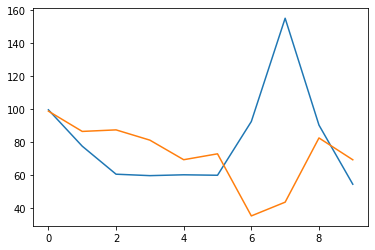

In [83]:
# 3. Training
history = train_rnn_model(model=rnn_model_4, epochs=200, patience=3)
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.show();

# 4. Evaluating
# The prediction (one per sequence/city)
# y_pred = rnn_model.predict(X_test) 
# print(y_pred.shape)
# Distribution of the predictions
# pd.DataFrame(y_pred).mean().sort_values(ascending=False)

# Alberto model #4 End Of the Road...

In [84]:
# 3. Training
def train_rnn_model(model, patience=20, epochs=200):
    es = EarlyStopping(monitor = 'val_loss',
                    patience = patience,
                    verbose = 0,
                    restore_best_weights = True)
    # The fit
    history =  model.fit(X_train,
            y_train, 
            validation_split=0.1, # Auto split for validation data
                ## validation_data = (X_val, y_val), # To be created manually if needed
            batch_size = 16,
            epochs = epochs,
            callbacks = [es],
            verbose=1)
    return history


# print(type(overfit_es), overfit_es)
# if overfit_es:
#     print("early stopping")
#     history = train_rnn_model(patience=overfit_es)
# else:
# print("No early stopping")
# history = train_rnn_model()

In [85]:
# 0. The Normalization Layer
# normalizer = Normalization()  # Instantiate a "normalizer" layer
# normalizer.adapt(X_train) # "Fit" it on the train set

### RNN model #3 architecture 

In [86]:
# 1. The Architecture
"""   - 3rd model layers architecture (simple -> complex) (less data -> more data) (print(loss) function check lecture)
> LSTM
"""
rnn_model_3 = Sequential()
rnn_model_3.add(normalizer) # Using the Normalization layer to standardize the datapoints during the forward pass
# Input len(train) (input_shape=(?,?))
rnn_model_3.add(LSTM(units=30, activation='tanh'))  ## , input_shape=(?,?))) without a Normalizer layer
# output return sequences = True
rnn_model_3.add(Dense(10, activation = 'relu')) ## add 1 or more 'relu' layers
# Output 10 only, no more RNN just dropout()
# rnn_model_3.add(layers.Dropout(0.3)) ## if RNN model over-fit
rnn_model_3.add(Dense(n_pred, activation = 'linear'))

### Model #1 evaluating

In [87]:
# 4. Evaluating
# The prediction (one per sequence/city)
y_pred = rnn_model_4.predict(X_test) 
print(y_pred.shape)
# Distribution of the predictions
pd.DataFrame(y_pred).mean().sort_values(ascending=False)

(20, 1)


0    55163.554688
dtype: float32

### Time Series Forecasting with model #1

### Compile model #3 with 'rmsprop'

In [88]:
# 2. Compiling with 'rmsprop' rather than 'adam' (recommended)
optimizer = RMSprop(
                learning_rate=0.001,
                rho=0.9,
                momentum=0.0,
                epsilon=1e-07,
                centered=False
            )
rnn_model_3.compile(loss='mse',
              optimizer= optimizer, # optimizer='rmsprop'    <- adapt learning rate
                 metrics='mape')  # Recommended optimizer for RNNs
rnn_model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, None, 20)         41        
 ion)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 30)                6120      
                                                                 
 dense_16 (Dense)            (None, 10)                310       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,482
Trainable params: 6,441
Non-trainable params: 41
_________________________________________________________________


In [89]:
rnn_model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 20)                3280      
                                                                 
 dense_14 (Dense)            (None, 10)                210       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


### Train model #2

Epoch 1/200
12/12 [==============================] - 9s 225ms/step - loss: 5849038848.0000 - mape: 99.9996 - val_loss: 4782161920.0000 - val_mape: 99.9993
Epoch 2/200
12/12 [==============================] - 1s 90ms/step - loss: 5848934912.0000 - mape: 99.9987 - val_loss: 4782081536.0000 - val_mape: 99.9985
Epoch 3/200
12/12 [==============================] - 1s 88ms/step - loss: 5848840704.0000 - mape: 99.9978 - val_loss: 4782003712.0000 - val_mape: 99.9977
Epoch 4/200
12/12 [==============================] - 1s 77ms/step - loss: 5848742912.0000 - mape: 99.9969 - val_loss: 4781923328.0000 - val_mape: 99.9969
Epoch 5/200
12/12 [==============================] - 1s 95ms/step - loss: 5848645632.0000 - mape: 99.9960 - val_loss: 4781848064.0000 - val_mape: 99.9958
Epoch 6/200
12/12 [==============================] - 1s 81ms/step - loss: 5848547840.0000 - mape: 99.9947 - val_loss: 4781759488.0000 - val_mape: 99.9943
Epoch 7/200
12/12 [==============================] - 1s 87ms/step - loss: 5

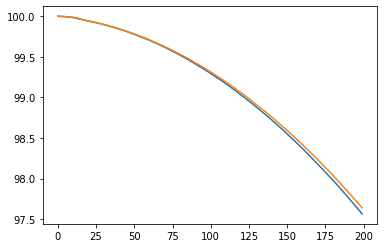

keras.callbacks.History

In [90]:
history = train_rnn_model(rnn_model_3, patience=5, epochs=200)
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.show();
type(history)

In [91]:
### Train model #1n_series = [50, 150, 200, 300, 400]
overfit_es =   [2, 6, 6, 5, 6 ]
print('type(overfit_es), overfit_es', type(overfit_es), overfit_es)
# if overfit_es:
#     print("early stopping")
#     history = train_rnn_model(patience=overfit_es)
# else:
# print("No early stopping")
for i in range(len(train_series)):
    history = train_rnn_model(model=rnn_model_3, epochs=train_series[i], patience=overfit_es[i])
    plt.plot(history.history['mape'])
    plt.plot(history.history['val_mape'])
    plt.show();

type(overfit_es), overfit_es <class 'list'> [2, 6, 6, 5, 6]


NameError: name 'train_series' is not defined

### RNN model #3 architecture 

#### 🚀 The **LSTM (= Long Short Term Memory)** with their ability to *avoid the vanishing gradient problem*, should be preferred over a SimpleRNN.

In [ ]:
# 1. The Architecture
"""   - 3rd model layers architecture (simple -> complex) (less data -> more data) (print(loss) function check lecture)
> LSTM
"""
rnn_model_3 = Sequential()
rnn_model_3.add(normalizer) # Using the Normalization layer to standardize the datapoints during the forward pass
# Input len(train) (input_shape=(?,?))
rnn_model_3.add(LSTM(units=30, activation='tanh'))  ## , input_shape=(?,?))) without a Normalizer layer
# output return sequences = True
rnn_model_3.add(Dense(10, activation = 'relu')) ## add 1 or more 'relu' layers
# Output 10 only, no more RNN just dropout()
# rnn_model_3.add(layers.Dropout(0.3)) ## if RNN model over-fit
rnn_model_3.add(Dense(n_pred, activation = 'linear'))

### Compile model #3 with 'rmsprop'

In [ ]:
# 2. Compiling with 'rmsprop' rather than 'adam' (recommended)
optimizer = RMSprop(
                learning_rate=0.001,
                rho=0.9,
                momentum=0.0,
                epsilon=1e-07,
                centered=False
            )
rnn_model_3.compile(loss='mse',
              optimizer= optimizer, # optimizer='rmsprop'    <- adapt learning rate
                 metrics='mape')  # Recommended optimizer for RNNs
rnn_model_3.summary()

### Train model #2

### RNN model #3 architecture 

In [ ]:
# 1. The Architecture
"""   - 3rd model layers architecture (simple -> complex) (less data -> more data) (print(loss) function check lecture)
> LSTM
"""
rnn_model_3 = Sequential()
rnn_model_3.add(normalizer) # Using the Normalization layer to standardize the datapoints during the forward pass
# Input len(train) (input_shape=(?,?))
rnn_model_3.add(LSTM(units=30, activation='tanh'))  ## , input_shape=(?,?))) without a Normalizer layer
# output return sequences = True
rnn_model_3.add(Dense(10, activation = 'relu')) ## add 1 or more 'relu' layers
# Output 10 only, no more RNN just dropout()
# rnn_model_3.add(layers.Dropout(0.3)) ## if RNN model over-fit
rnn_model_3.add(Dense(n_pred, activation = 'linear'))

### Compile model #3 with 'rmsprop'

In [ ]:
# 2. Compiling with 'rmsprop' rather than 'adam' (recommended)
optimizer = RMSprop(
                learning_rate=0.001,
                rho=0.9,
                momentum=0.0,
                epsilon=1e-07,
                centered=False
            )
rnn_model_3.compile(loss='mse',
              optimizer= optimizer, # optimizer='rmsprop'    <- adapt learning rate
                 metrics='mape')  # Recommended optimizer for RNNs
rnn_model_3.summary()

### Train model #3

In [ ]:
# 3. Training
from typing import overload

def train_rnn_model(rnn_model_3, patience=2, epochs=200, (X_val, y_val)=(0, 0)):
    es = EarlyStopping(monitor = 'val_loss',
                    patience = patience,
                    verbose = 0,
                    restore_best_weights = True)
    # The fit
    history =  rnn_model_3.fit(X_train, y_train, 
            validation_split=0.1, # Auto split for validation data
                ## validation_data = (X_val, y_val), # To be created manually if needed
            batch_size = 16,
            epochs = epochs,
            callbacks = [es],
            verbose=1)
    return history


print(type(overfit_es), overfit_es)
# if overfit_es:
#     print("early stopping")
#     history = train_rnn_model(patience=overfit_es)
# else:
# print("No early stopping")
# history = train_rnn_model()

### Train model #2

In [ ]:
# min(history.history['mape'])

# print("adjust early stopping")
# overfit_es = [d[0]+1 for d in enumerate(history.history['mape']) if d[1] == min(history.history['mape'])][0]
# overfit_es

In [ ]:
min(history.history['mape']), max(history.history['mape']), history.history['mape'] # blue line

In [ ]:
max(history.history['val_mape']), history.history['val_mape'] # orange line

### Model #1 evaluating

In [ ]:
# 4. Evaluating
# The prediction (one per sequence/city)
y_pred = rnn_model.predict(X_test) 
print(y_pred.shape)
# Distribution of the predictions
pd.DataFrame(y_pred).mean().sort_values(ascending=False)

### Time Series Forecasting with model #1

In [ ]:
# Check your code below
assert y_pred.shape == (n_seq_test, n_pred)
# Distribution of the real values y_train
pd.DataFrame(y_train).mean().sort_values(ascending=False)

In [ ]:
# Distribution of the real values y_train
pd.DataFrame(y_train).mean().sort_values(ascending=False)

In [ ]:
### Train model #1n_series = [50, 150, 200, 300, 400]
overfit_es =   [2, 6, 6, 5, 6 ]
print('type(overfit_es), overfit_es', type(overfit_es), overfit_es)
# if overfit_es:
#     print("early stopping")
#     history = train_rnn_model(patience=overfit_es)
# else:
# print("No early stopping")
for i in range(len(train_series)):
    history = train_rnn_model(model=rnn_model_2, epochs=train_series[i], patience=overfit_es[i])
    plt.plot(history.history['mape'])
    plt.plot(history.history['val_mape'])
    plt.show();

In [ ]:
def train_rnn(X_val=0, y_val=0):
    [print(f'validation_data=(X_val, y_val),') if (X_val!=0 or y_val!=0) else print(f'validation_split=0.1,')]
    return True

train_rnn(),train_rnn((1),(0))
    